# Heart Disease Exploration, Analysis, and Predictive Modeling


## Project Overview
This project focuses on the analysis and predictive modeling of heart disease risk using a comprehensive dataset. We aim to uncover patterns and correlations in patient demographics and health-related attributes to identify factors associated with heart disease. Through data preprocessing, exploration, visualization, and predictive modeling, this project highlights key health and lifestyle factors contributing to heart disease risk. Various machine learning models are applied and evaluated to identify the most accurate and efficient model for predicting heart disease presence.

## The project code

### 1. Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


### 2. Reading the dataset:

In [2]:
df=pd.read_csv('/kaggle/input/heart-2020-cleaned/heart_2020_cleaned.csv')
data = df

### 3. Data Exploration:

#### a- Showing first 5 rows of the dataframe:

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#### b- Showing the columns:

In [4]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

#### c- Getting some informations about the dataset:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

#### d- Showing number of rows and columns:

In [6]:
df.shape

(319795, 18)

#### e- Statistical Measures of the dataset:

In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


#### f- Checking nulls values in dataframe:

In [8]:
df.isna().sum() 

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

The dataset doesn't contain null values

#### g- Showing details about the variables using visualisation:

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

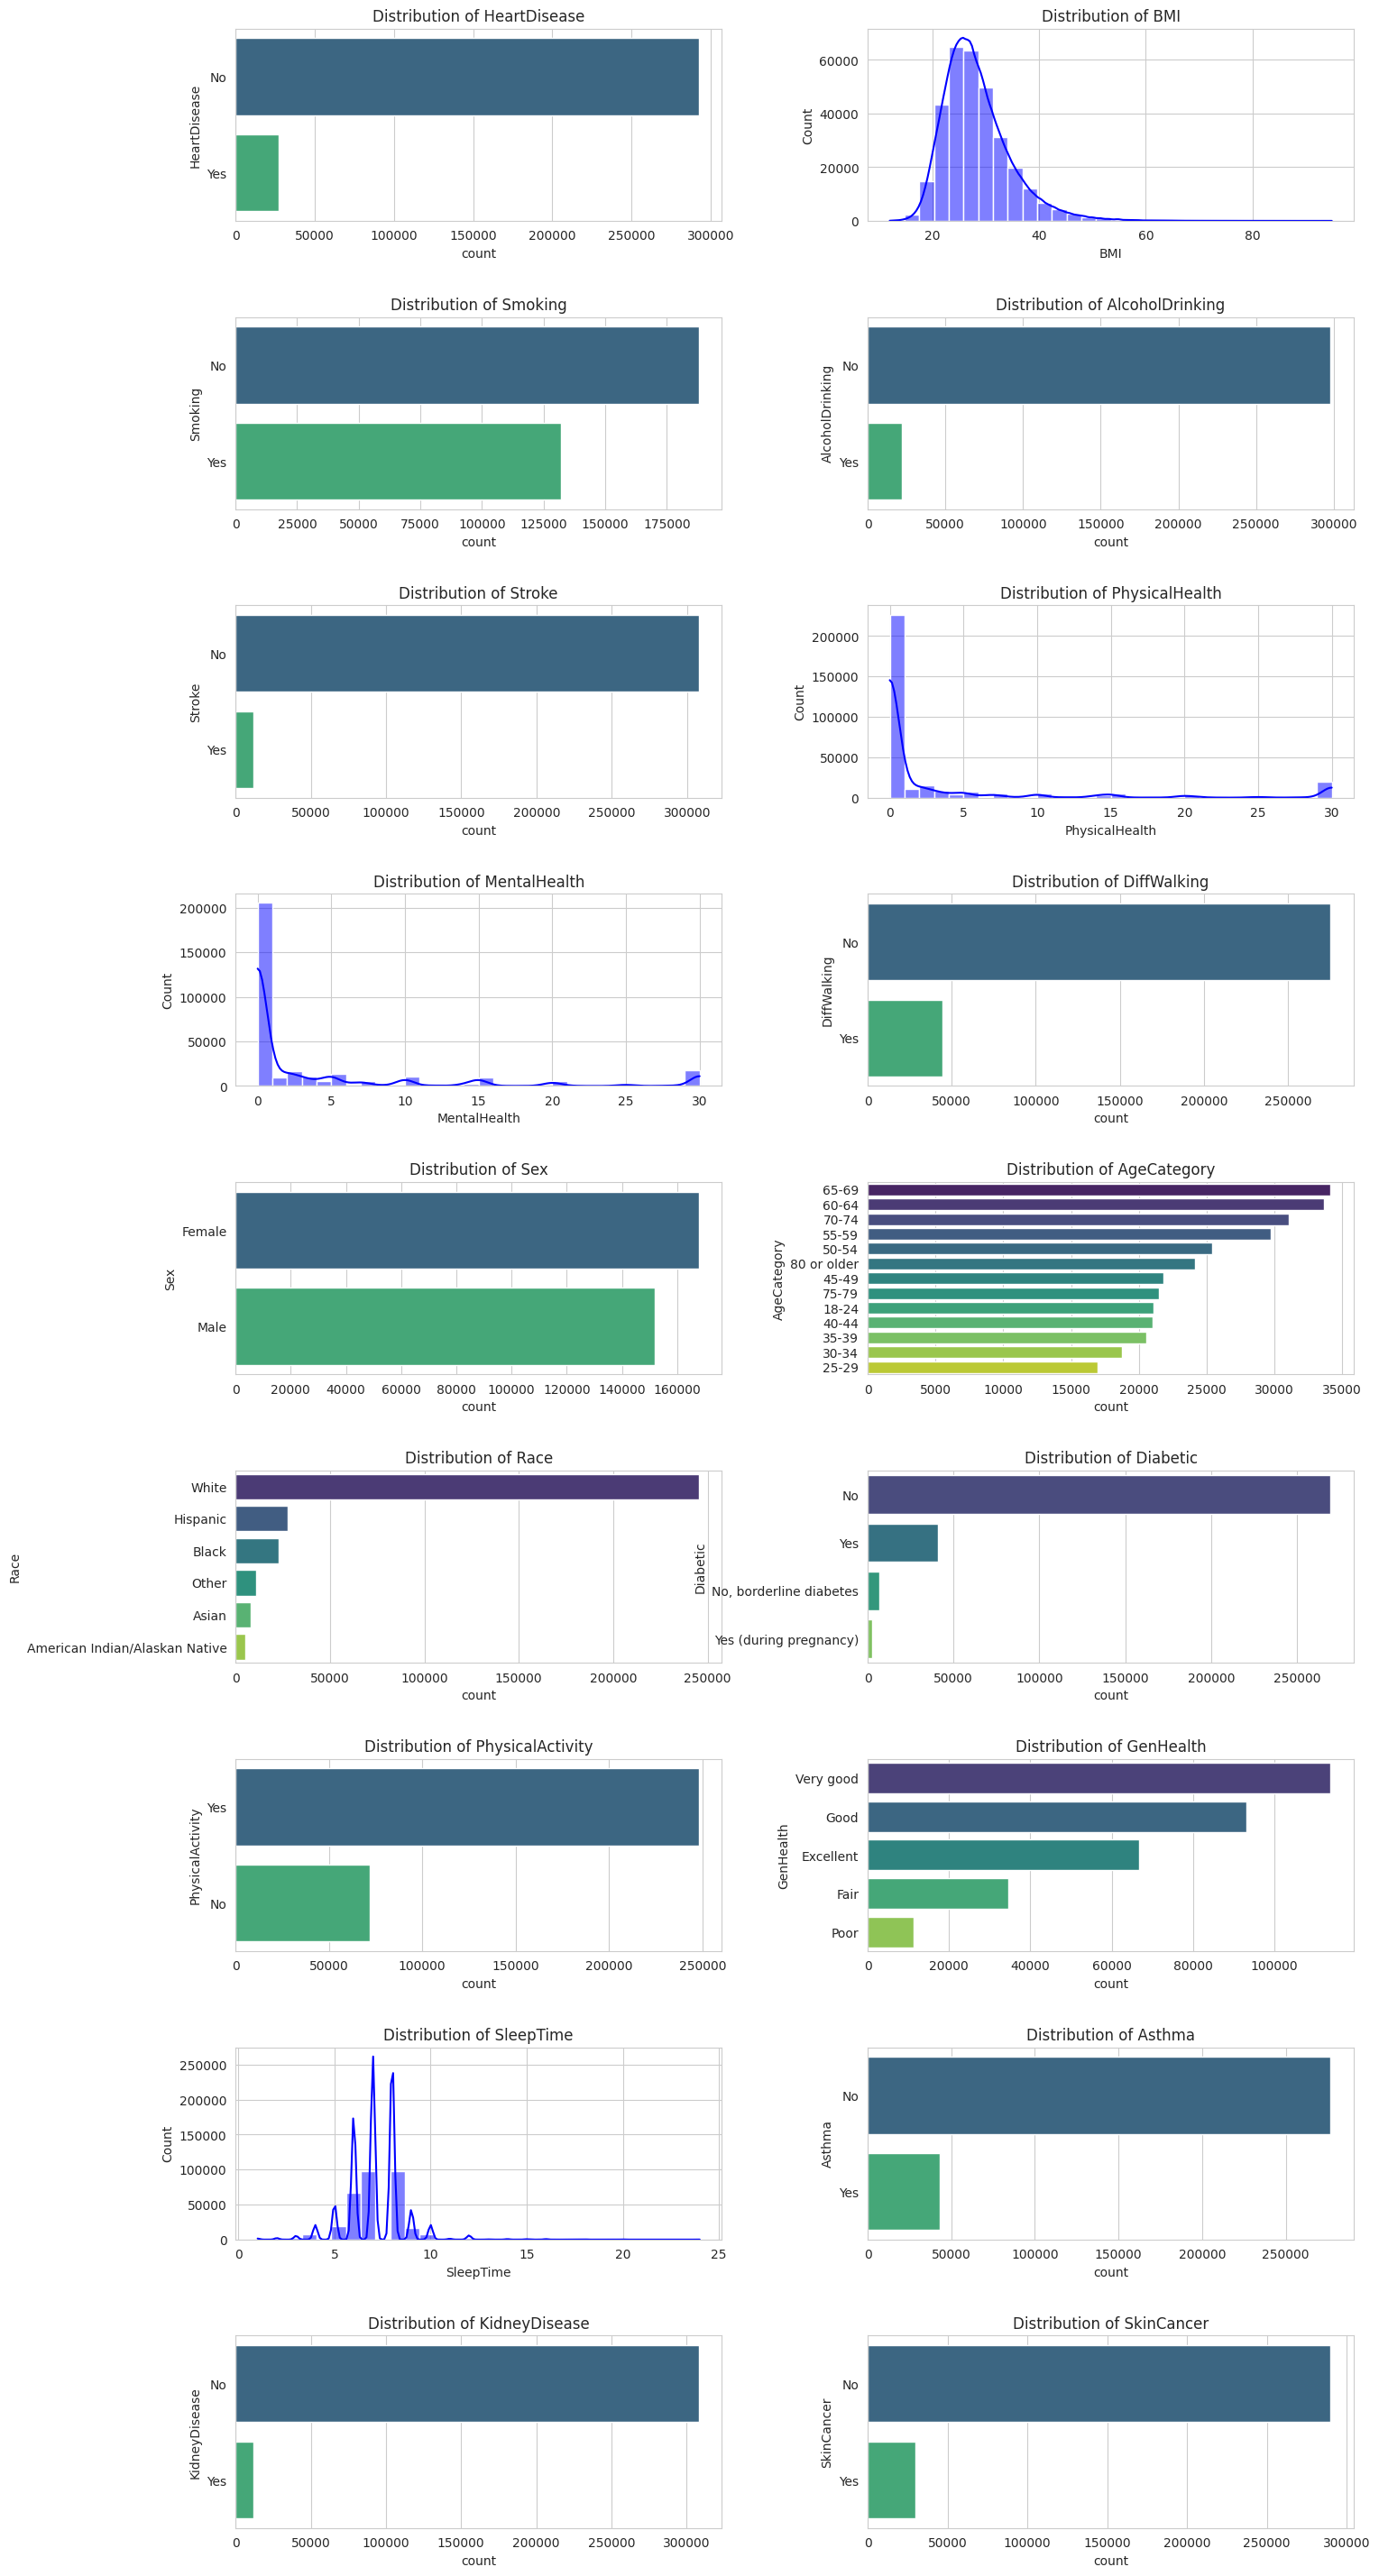

In [9]:
# Set up visualization styles
sns.set_style("whitegrid")

# Define the number of columns and rows dynamically
num_cols = 2  # Fewer columns to avoid overcrowding
num_vars = len(data.columns)
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

# Create subplots with a larger figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Generate visualizations for each column
for i, col in enumerate(data.columns):
    if data[col].dtype == 'object':  
        # Categorical variables - barplot
        sns.countplot(y=data[col], order=data[col].value_counts().index, ax=axes[i], palette="viridis")
        axes[i].set_title(f"Distribution of {col}")
    else:  
        # Numerical variables - histogram
        sns.histplot(data[col], bins=30, kde=True, ax=axes[i], color="blue")
        axes[i].set_title(f"Distribution of {col}")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


### 4. Data Analysis

#### a- What is the percentage distribution of sex by heart disease status?

In [10]:
data.groupby("HeartDisease")['Sex'].value_counts(normalize=True)*100

HeartDisease  Sex   
No            Female    53.542825
              Male      46.457175
Yes           Male      58.959559
              Female    41.040441
Name: proportion, dtype: float64

#### b- What is the percentage distribution of sex by smoking status ?

In [11]:
data.groupby("Smoking")['Sex'].value_counts(normalize=True)*100

Smoking  Sex   
No       Female    56.031551
         Male      43.968449
Yes      Male      52.596507
         Female    47.403493
Name: proportion, dtype: float64

#### c-  What is the percentage distribution of sex by alcohol drinking status ?

In [12]:
data.groupby("AlcoholDrinking")['Sex'].value_counts(normalize=True)*100

AlcoholDrinking  Sex   
No               Female    52.529377
                 Male      47.470623
Yes              Female    51.696744
                 Male      48.303256
Name: proportion, dtype: float64

#### d- What is the overall ratio of Heart Disease ?

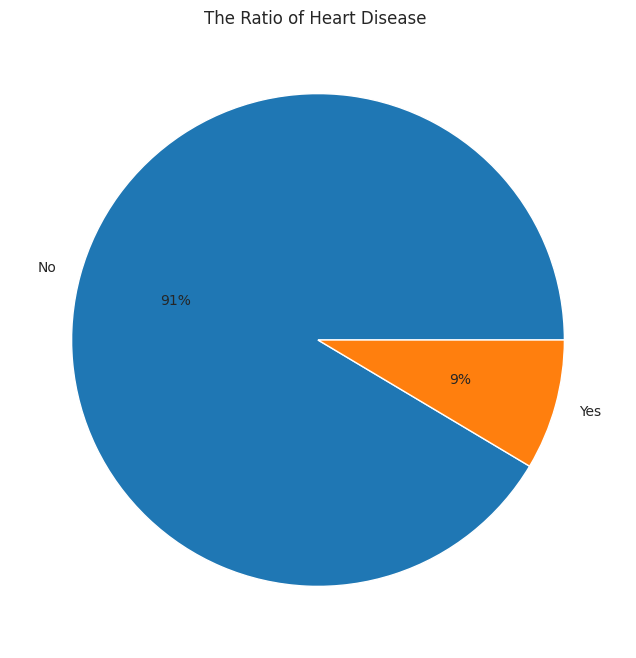

In [13]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(data['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"])
ax.set_title('The Ratio of Heart Disease ')
fig.show()

#### e- What is the relation between heart disease, skin cancer & kidney disease Vs the age ?

In [14]:
age_order = sorted(data['AgeCategory'].unique(), key=lambda x: int(x.split('-')[0]) if '-' in x else int(x.split()[0]))
print(age_order)


['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

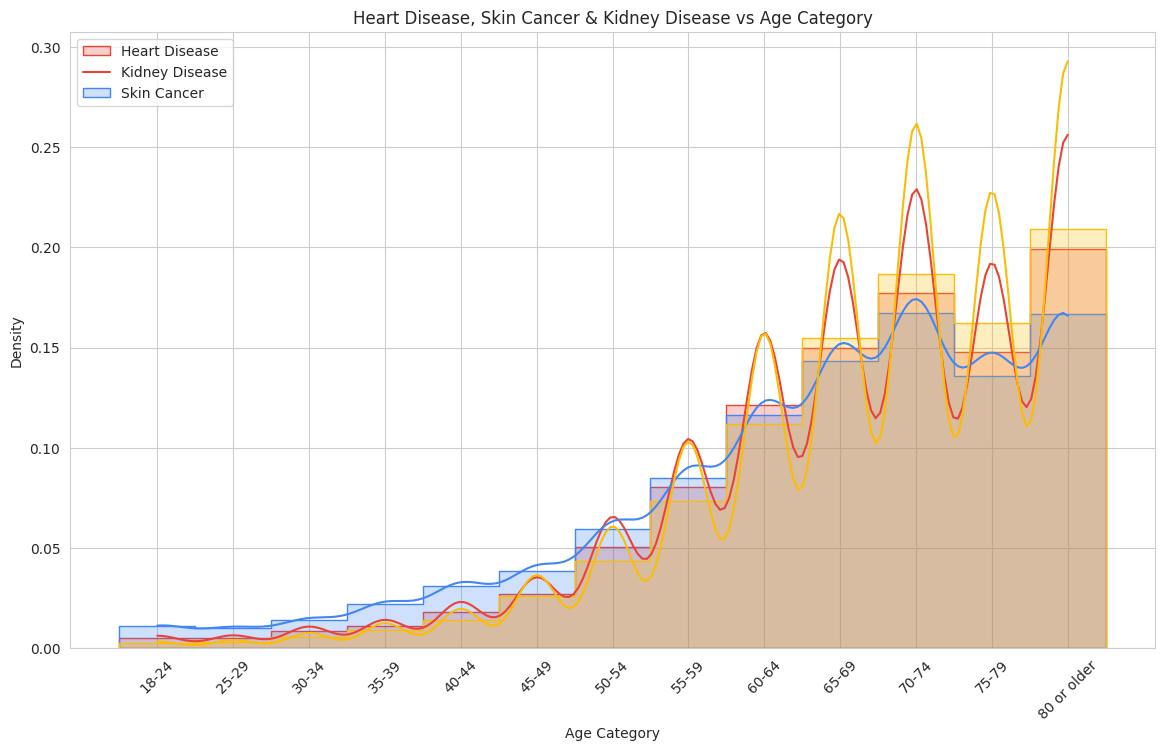

In [15]:
# Convert AgeCategory to an ordered categorical variable
data['AgeCategory'] = pd.Categorical(data['AgeCategory'], categories=age_order, ordered=True)

# Set figure size
plt.figure(figsize=(14, 8))

# Plot histogram for each disease category
sns.histplot(data=data[data["HeartDisease"] == "Yes"], x="AgeCategory", hue="HeartDisease", bins=len(age_order),
             palette=["#ea4335"], kde=True, element="step", stat="density", discrete=True)

sns.histplot(data=data[data["KidneyDisease"] == "Yes"], x="AgeCategory", hue="KidneyDisease", bins=len(age_order),
             palette=["#4285f4"], kde=True, element="step", stat="density", discrete=True)

sns.histplot(data=data[data["SkinCancer"] == "Yes"], x="AgeCategory", hue="SkinCancer", bins=len(age_order),
             palette=["#fbbc05"], kde=True, element="step", stat="density", discrete=True)

# Customize labels and title
plt.xlabel("Age Category")
plt.ylabel("Density")
plt.xticks(rotation=45)
plt.title("Heart Disease, Skin Cancer & Kidney Disease vs Age Category")

plt.legend(["Heart Disease", "Kidney Disease", "Skin Cancer"])
plt.show()


The graph clearly shows that older individuals have a higher prevalence of heart disease, skin cancer, and kidney disease.

#### f- The relation between Heart Disease & Sex:

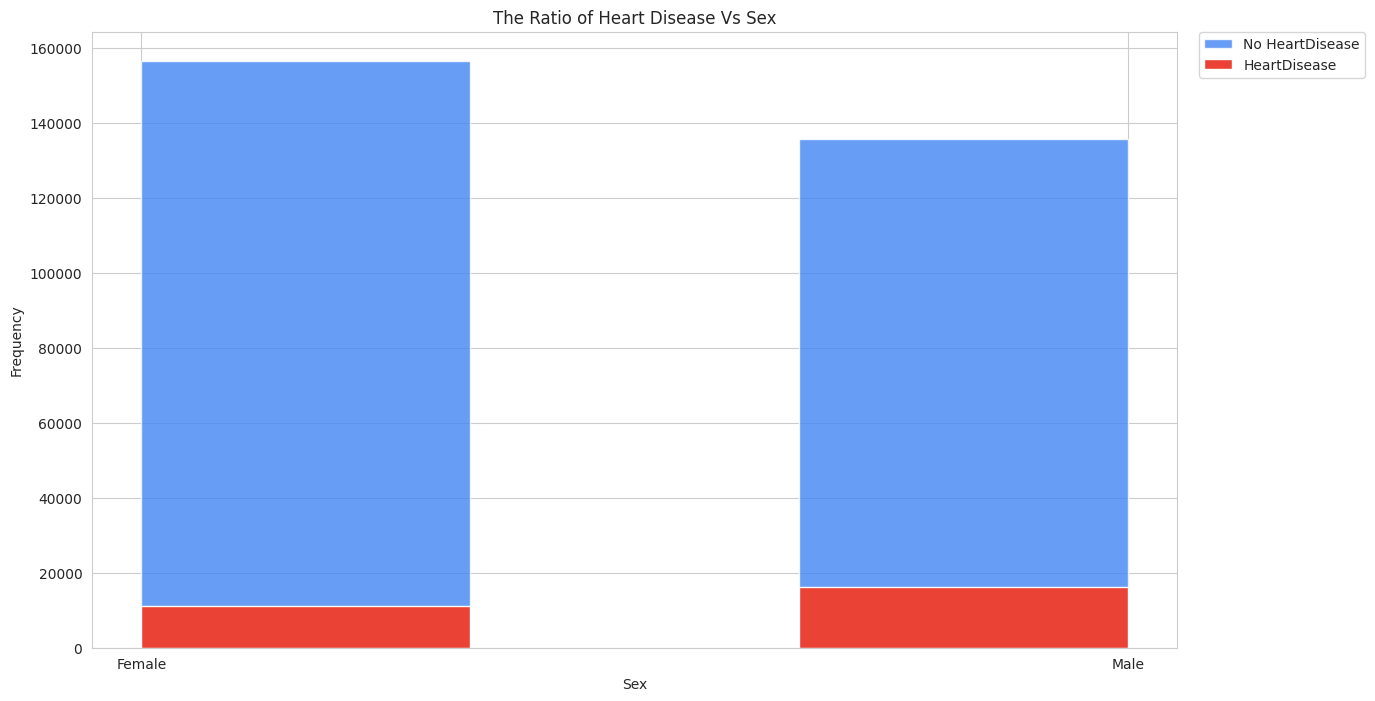

In [16]:
fig, ax = plt.subplots(figsize = (14,8))

ax.hist(data[data["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")
plt.title('The Ratio of Heart Disease Vs Sex')
ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


In [17]:
female_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Sex']=='Female')])
num_female = len(data[data['Sex']=='Female'])
male_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Sex']=='Male')])
num_male = len(data[data['Sex']=='Male'])

# Calculate and display the probabilities in percentage format
print('Probability of Male to have Heart disease: {:.2f}%'.format((male_with_heart_disease / num_male) * 100))
print('Probability of Female to have Heart disease: {:.2f}%'.format((female_with_heart_disease / num_female) * 100))


Probability of Male to have Heart disease: 10.62%
Probability of Female to have Heart disease: 6.69%


- Most heart disease patients are Male than Females

- More Females were tested than males

- Males are approximately 1.6 times more likely to have heart disease than females


#### g- What is the effect of smoking in Heart disease ?


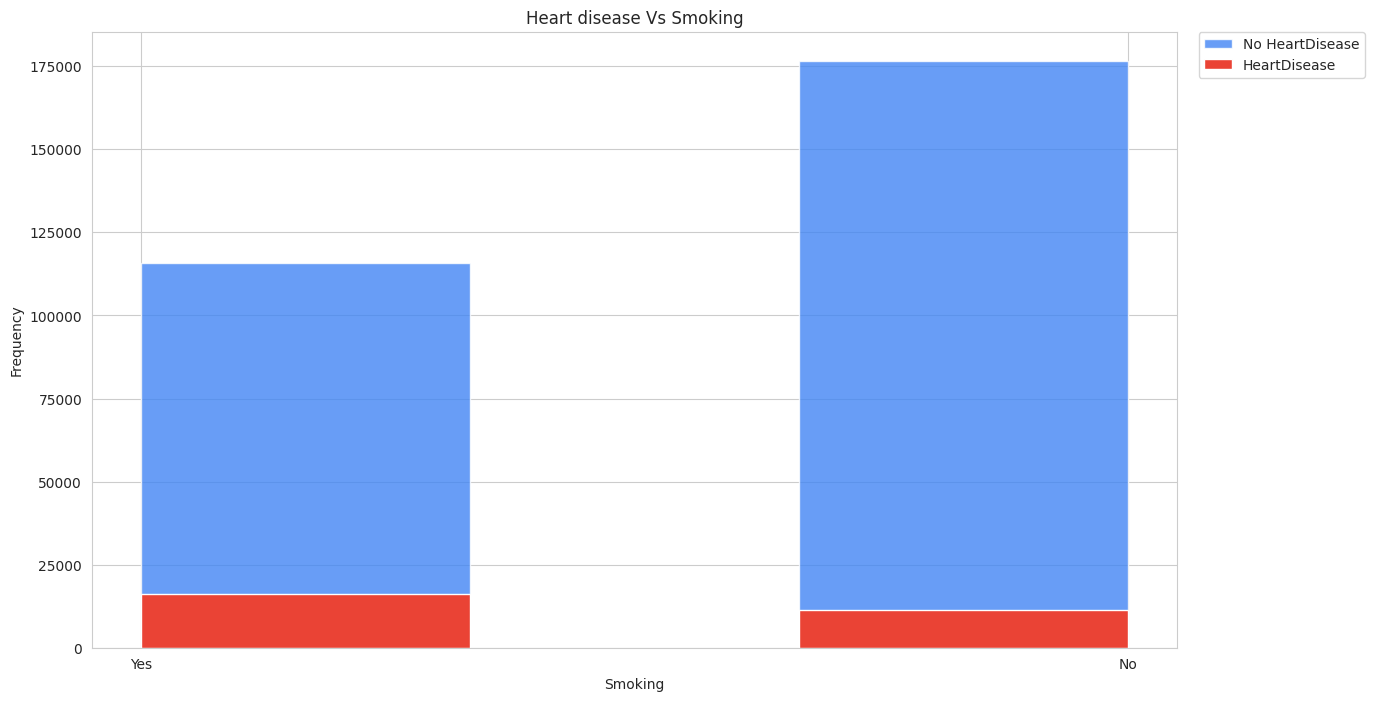

In [18]:
fig, ax = plt.subplots(figsize = (14,8))

ax.hist(data[data["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs Smoking')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In [19]:
smoke_and_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Smoking']=='Yes')])
num_smoke = len(data[data['Smoking']=='Yes'])
no_smoke_and_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Smoking']=='No')])
num_no_smoke = len(data[data['Smoking']=='No'])

# Calculate and display the probabilities in percentage format
print('Probability of Heart disease if you smoke: {:.2f}%'.format((smoke_and_heart_disease / num_smoke) * 100))
print("Probability of Heart disease if you don't smoke: {:.2f}%".format((no_smoke_and_heart_disease / num_no_smoke) * 100))


Probability of Heart disease if you smoke: 12.16%
Probability of Heart disease if you don't smoke: 6.03%


- Most heart disease patients smoke

- People who smoke are approximately twice as likely to have heart disease than people who don't smoke

#### h- What is the relation of Heart disease Vs the race ?


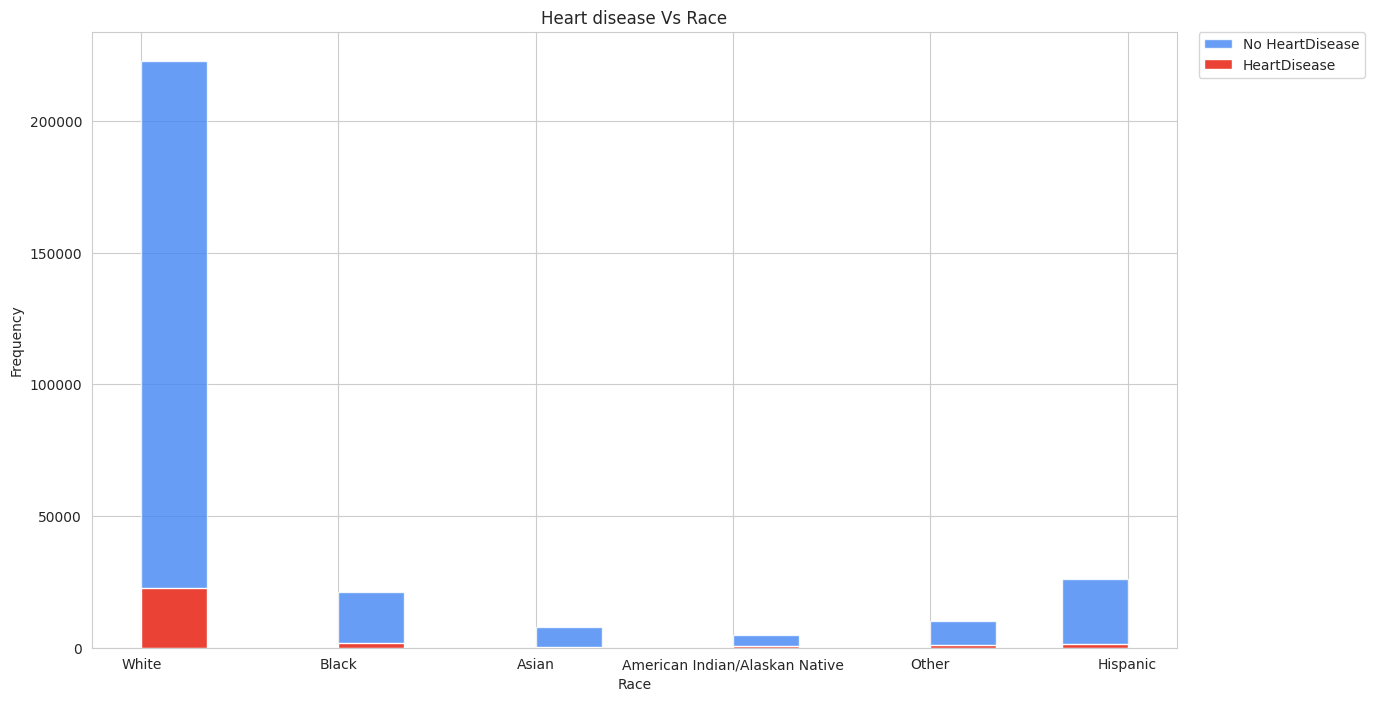

In [20]:
fig, ax = plt.subplots(figsize = (14,8))

ax.hist(data[data["HeartDisease"]=='No']["Race"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Race"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs Race')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

#### i- does the general health affect to Heart disease ?

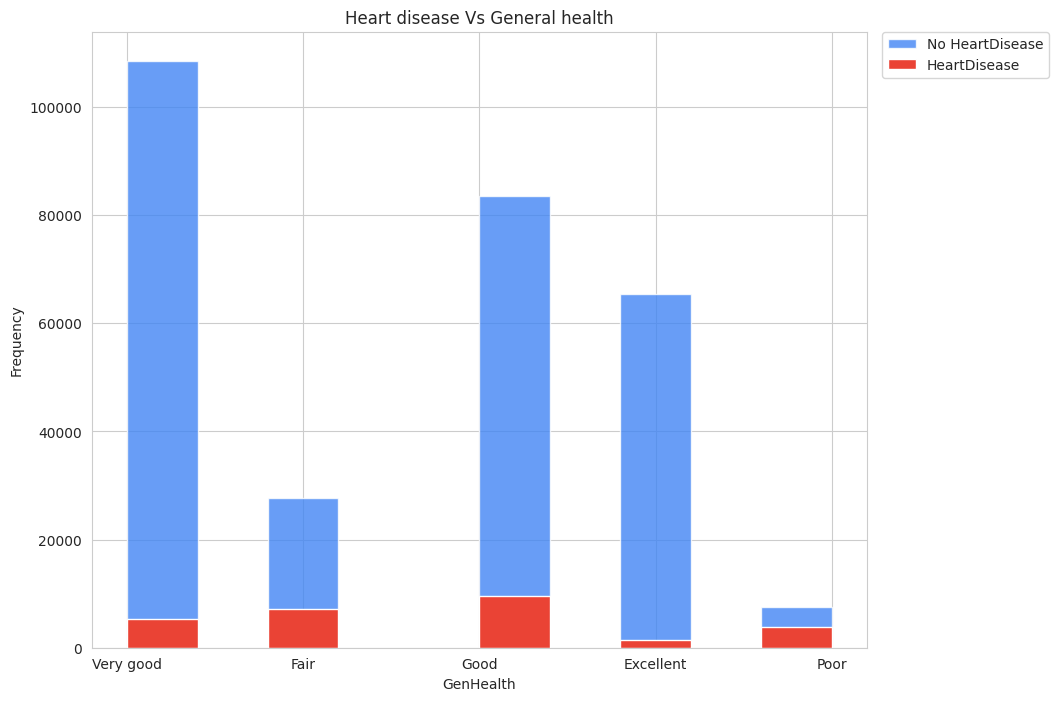

In [21]:
fig, ax = plt.subplots(figsize = (10,8))

ax.hist(data[data["HeartDisease"]=='No']["GenHealth"], bins=10, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["GenHealth"], bins=10, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs General health')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

- Most poor general health Patients have high heart Disease

#### j- What is the relation of Heart disease & BMI ?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


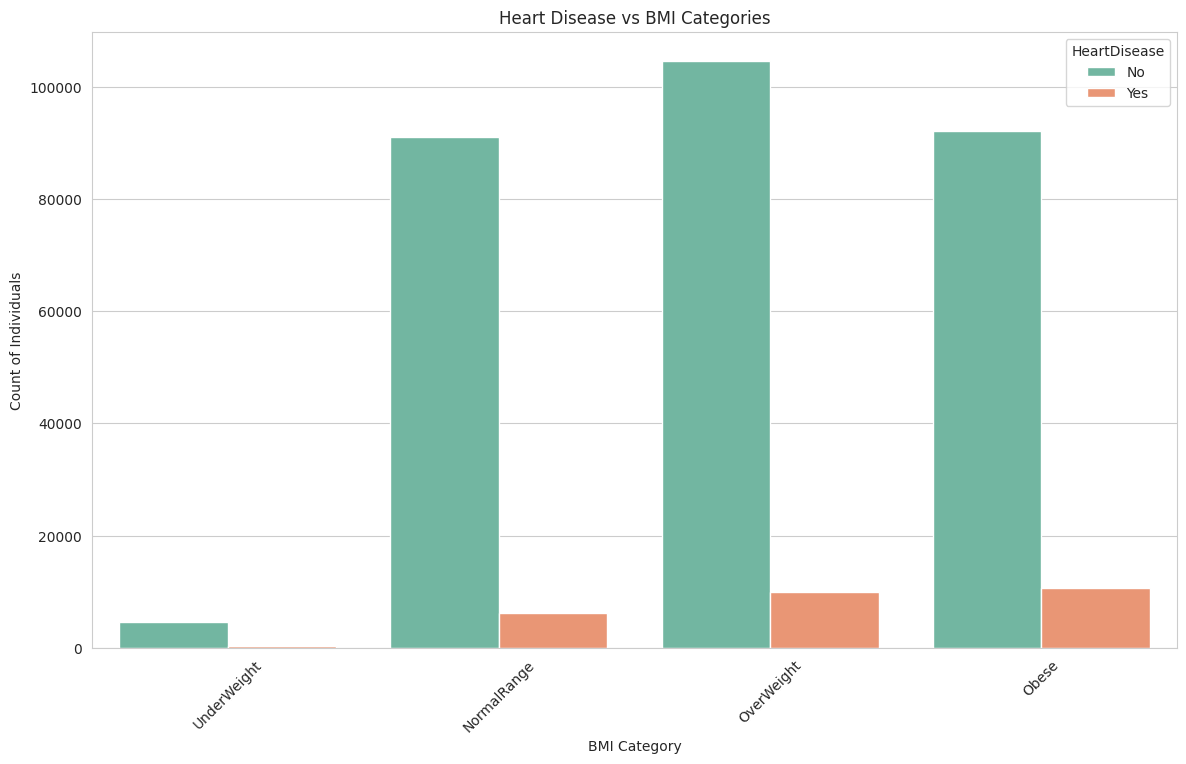

In [22]:
# Step 1: Categorize BMI into ranges without modifying the original dataset
bmi_category = pd.cut(data['BMI'],
                      bins=[0, 18.5, 25, 30, float('inf')],
                      labels=['UnderWeight', 'NormalRange', 'OverWeight', 'Obese'],
                      right=False)

# Step 2: Plot a bar chart of Heart Disease vs BMI Categories
plt.figure(figsize=(14, 8))

sns.countplot(x=bmi_category, hue=data['HeartDisease'], palette='Set2')

# Customize the plot
plt.title('Heart Disease vs BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count of Individuals')
plt.xticks(rotation=45)

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


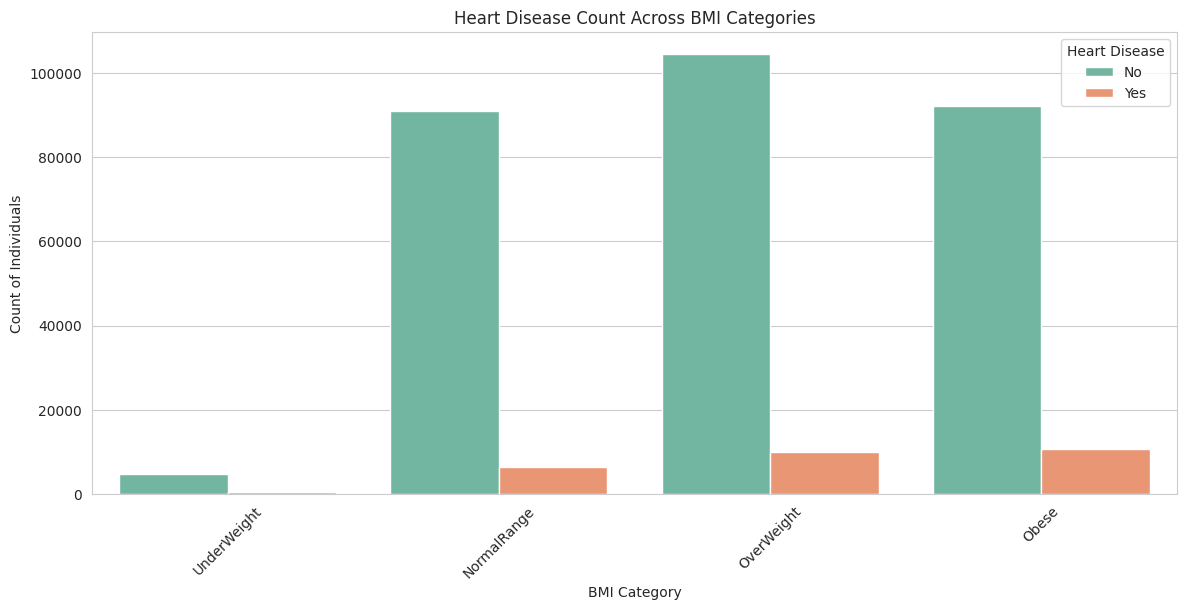

<ipython-input-23-89baecb8f06f>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('BMI_Category')['HeartDisease'] \
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


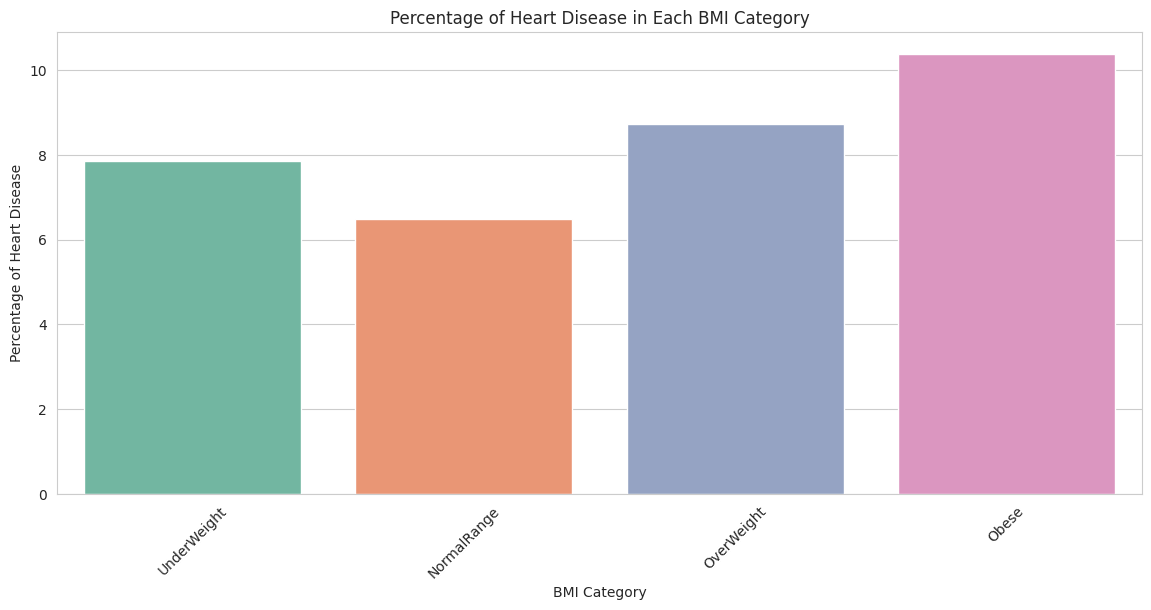

In [23]:
# Step 1: Categorize BMI into ranges without modifying the original dataset
bmi_category = pd.cut(data['BMI'],
                      bins=[0, 18.5, 25, 30, float('inf')],
                      labels=['UnderWeight', 'NormalRange', 'OverWeight', 'Obese'],
                      right=False)

# Step 2: Plot a countplot (Heart Disease vs BMI Categories)
plt.figure(figsize=(14, 6))
sns.countplot(x=bmi_category, hue=data['HeartDisease'], palette='Set2')

# Customize the plot
plt.title('Heart Disease Count Across BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count of Individuals')
plt.xticks(rotation=45)
plt.legend(title="Heart Disease")
plt.show()

# Step 3: Calculate the percentage of heart disease cases in each BMI category
heart_disease_counts = pd.DataFrame({'BMI_Category': bmi_category, 'HeartDisease': data['HeartDisease']}) \
                        .groupby('BMI_Category')['HeartDisease'] \
                        .value_counts(normalize=True) \
                        .unstack()

# Step 4: Calculate the percentage of "HeartDisease == 'Yes'" in each category
heart_disease_percentage = heart_disease_counts['Yes'] * 100  # Convert to percentage

# Step 5: Plot the percentage of heart disease cases in each BMI category
plt.figure(figsize=(14, 6))
sns.barplot(x=heart_disease_percentage.index, y=heart_disease_percentage.values, palette='Set2')

# Customize the plot
plt.title('Percentage of Heart Disease in Each BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Percentage of Heart Disease')
plt.xticks(rotation=45)

# Display the plot
plt.show()


#### k- What is the percentage of heart disease in each age category?

<ipython-input-24-f5124e76d1b0>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_heart_disease_counts = data.groupby('AgeCategory')['HeartDisease'].value_counts(normalize=True).unstack()
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


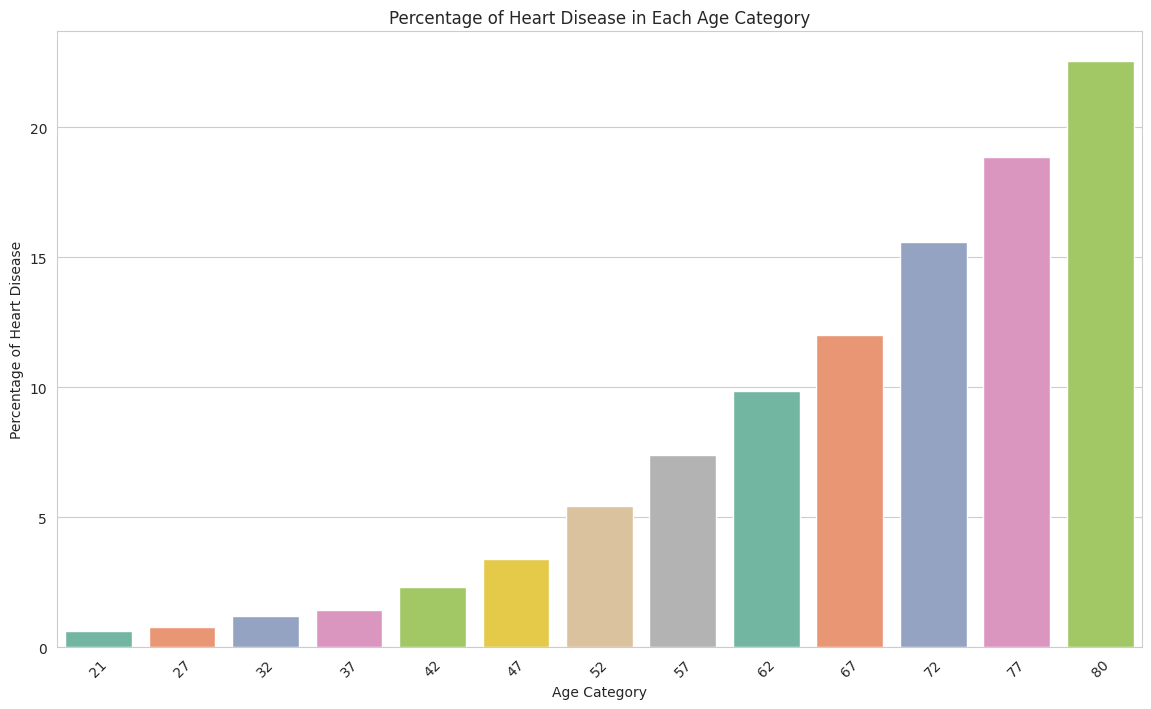

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


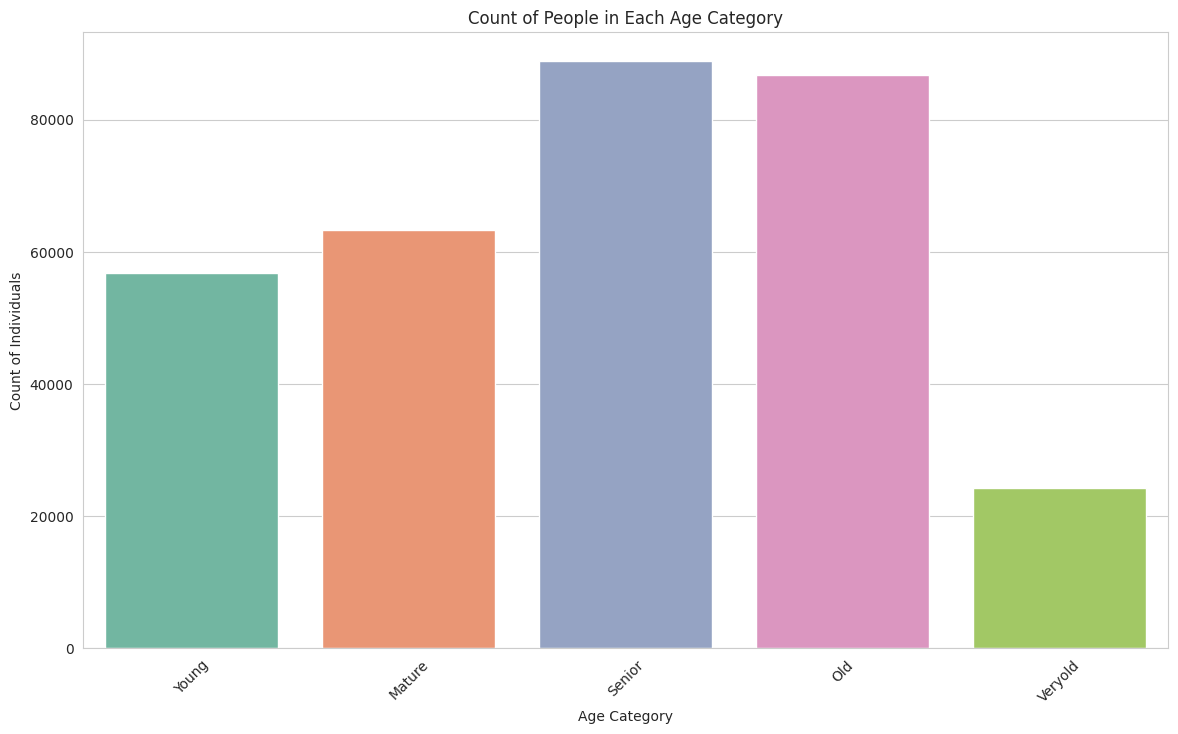

In [24]:
# Mapping AgeCategory to numeric values
encode_AgeCategory = {
    '55-59': 57, '80 or older': 80, '65-69': 67, '75-79': 77,
    '40-44': 42, '70-74': 72, '60-64': 62, '50-54': 52, 
    '45-49': 47, '18-24': 21, '35-39': 37, '30-34': 32, '25-29': 27
}

data['AgeCategory'] = data['AgeCategory'].apply(lambda x: encode_AgeCategory[x])

# Step 1: Classify Age into categories based on numeric values
Young = data['AgeCategory'][(data['AgeCategory'] <= 32.0)]
Mature = data['AgeCategory'][(data['AgeCategory'] >= 37.0) & (data['AgeCategory'] <= 47.0)]
Senior = data['AgeCategory'][(data['AgeCategory'] >= 52.0) & (data['AgeCategory'] <= 62.0)]
Old = data['AgeCategory'][(data['AgeCategory'] >= 67.0) & (data['AgeCategory'] <= 77.0)]
Veryold = data['AgeCategory'][(data['AgeCategory'] == 80.0)]

# Create Age category labels and count of people in each category
Age_X = ['Young', 'Mature', 'Senior', 'Old', 'Veryold']
Age_Y = [len(Young.values), len(Mature.values), len(Senior.values), len(Old.values), len(Veryold.values)]

# Step 2: Calculate the percentage of Heart Disease in each Age Category
age_heart_disease_counts = data.groupby('AgeCategory')['HeartDisease'].value_counts(normalize=True).unstack()
age_heart_disease_percentage = age_heart_disease_counts['Yes'] * 100  # Percentage of people with Heart Disease

# Step 3: Plot the percentage of Heart Disease in each Age Category
plt.figure(figsize=(14, 8))
sns.barplot(x=age_heart_disease_percentage.index, y=age_heart_disease_percentage.values, palette='Set2')

# Customize the plot
plt.title('Percentage of Heart Disease in Each Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Heart Disease')
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Step 4: Plot the bar chart for Age categories (count of people in each category)
plt.figure(figsize=(14, 8))
sns.barplot(x=Age_X, y=Age_Y, palette='Set2')

# Customize the plot
plt.title('Count of People in Each Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count of Individuals')
plt.xticks(rotation=45)

# Display the plot
plt.show()


### 4. Data Processing:

#### a- Converting catergical data to numerical:
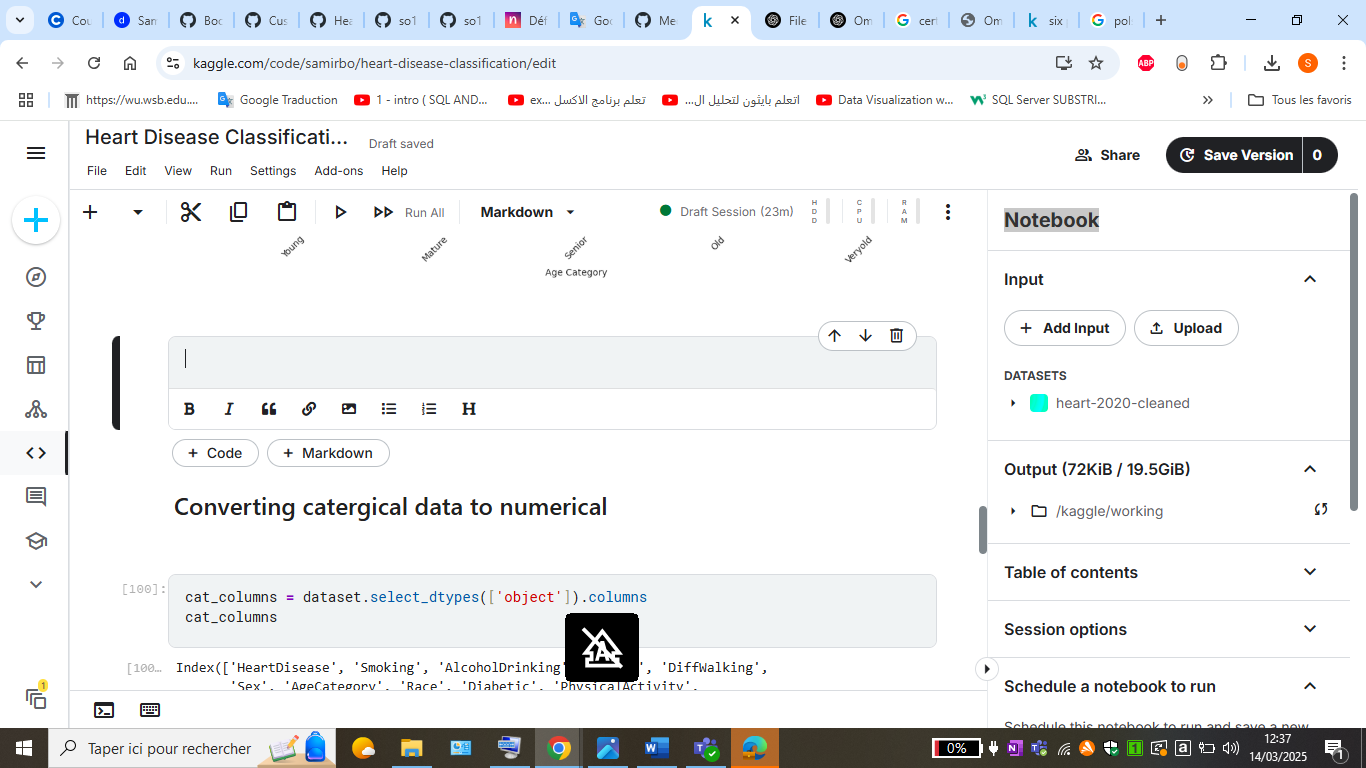

In [25]:
cat_columns = df.select_dtypes(['object']).columns
cat_columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [26]:
df = pd.get_dummies(df, columns = cat_columns[1:])
df['HeartDisease'].replace({'Yes':1,'No':0},inplace=True)
df= df.astype(int)
df.head()

<ipython-input-26-2cafd398fd0e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HeartDisease'].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-26-2cafd398fd0e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HeartDisease'].replace({'Yes':1,'No':0},inplace=True)


,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16,3,30,57,5,0,1,1,0,...,0,0,0,1,0,1,1,0,0,1
1,0,20,0,0,80,7,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26,20,30,67,8,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
3,0,24,0,0,77,6,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,0,23,28,0,42,8,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0


#### b- Feature selection:

In [27]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

#### c- Data scaling: 

In [28]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,-1.860216,-0.046751,3.281069,0.149220,-1.460354,-1.193474,1.193474,0.27032,-0.27032,0.198040,...,-0.348745,-0.640987,-0.191292,1.344886,-2.541515,2.541515,0.195554,-0.195554,-3.118419,3.118419
1,-1.231519,-0.424070,-0.490039,1.447159,-0.067601,0.837890,-0.837890,0.27032,-0.27032,-5.049478,...,-0.348745,-0.640987,-0.191292,1.344886,0.393466,-0.393466,0.195554,-0.195554,0.320675,-0.320675
2,-0.288474,2.091388,3.281069,0.713541,0.628776,-1.193474,1.193474,0.27032,-0.27032,0.198040,...,2.867422,-0.640987,-0.191292,-0.743558,-2.541515,2.541515,0.195554,-0.195554,0.320675,-0.320675
3,-0.602822,-0.424070,-0.490039,1.277863,-0.763977,0.837890,-0.837890,0.27032,-0.27032,0.198040,...,-0.348745,1.560094,-0.191292,-0.743558,0.393466,-0.393466,0.195554,-0.195554,-3.118419,3.118419
4,-0.759997,3.097572,-0.490039,-0.697262,0.628776,0.837890,-0.837890,0.27032,-0.27032,0.198040,...,-0.348745,-0.640987,-0.191292,1.344886,0.393466,-0.393466,0.195554,-0.195554,0.320675,-0.320675


#### d- Splitting the dataset and balancing the heart disease results:
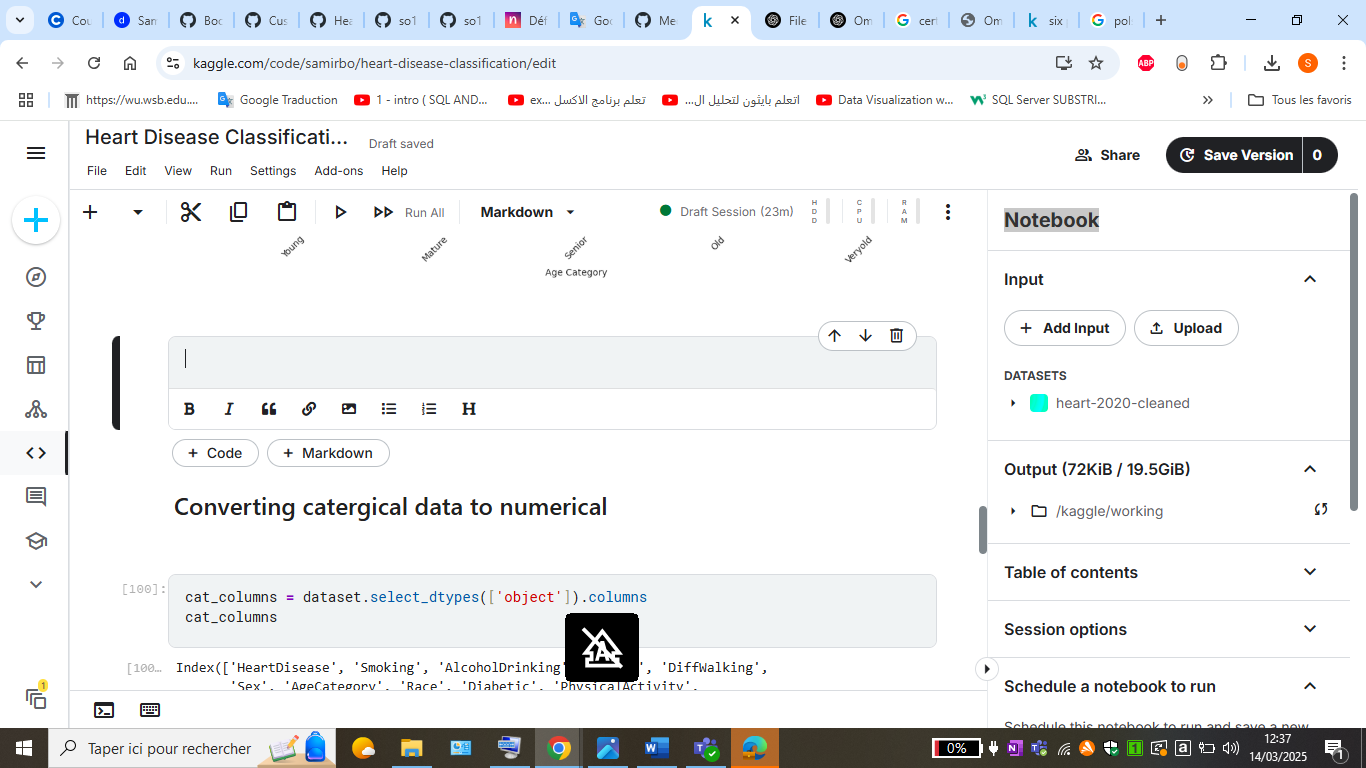

In [29]:
over = SMOTE(k_neighbors=2000)
X, y = over.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, stratify=y)

#### e- Checking the balance:

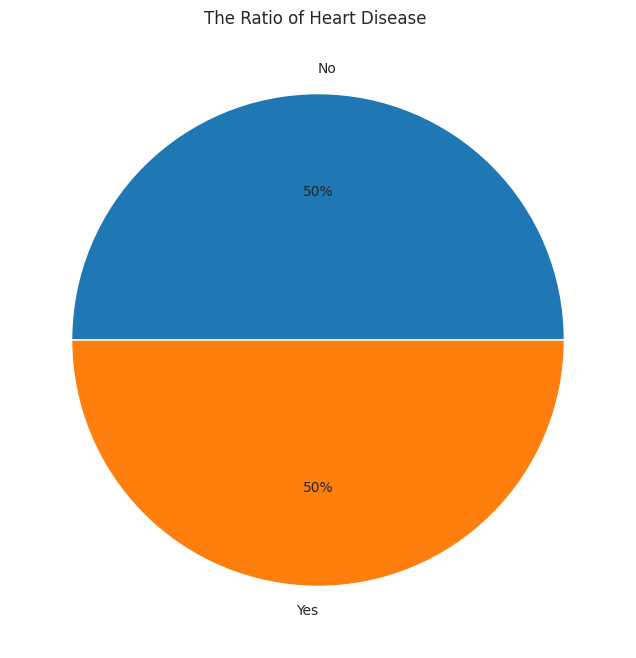

In [30]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(y.value_counts(),autopct='%1.0f%%',labels=['No',"Yes"])
ax.set_title('The Ratio of Heart Disease ')
plt.show()

### 5. Modelling

#### a- Building the models and defining the evaluation function :

In [31]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=44, max_depth=20),
    "Logistic R.": LogisticRegression(random_state=44),
    "Naive Bayes C": BernoulliNB(),
    "SVC": SVC(kernel='linear', max_iter=100, C=1.0, gamma='auto'),
    "Random Forest": RandomForestClassifier(random_state=44, max_depth=20)
}

results = pd.DataFrame(columns=['Model', 'Recall TP/TP+FN', 'Precision TP/TP+FP', 'F1-score', 'Accuracy TP+TN)/All'])

def test_models(X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        fit = model.fit(X_train, y_train)
        y_pred = fit.predict(X_test)

        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Display confusion matrix
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.set_title(model_name)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues', ax=ax, colorbar=False)
        plt.grid(False)
        plt.show()

        # Compute metrics
        recall = round(recall_score(y_test, y_pred) * 100, 2)  # TP /(TP + FN)
        precision = round(precision_score(y_test, y_pred) * 100, 2)  # TP /(TP + FP)   
        f1 = round(f1_score(y_test, y_pred) * 100, 2)  # F1 = 2 * (precision * recall) / (precision + recall)
        accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)  # (TP + TN) / (TP + TN + FP + FN)

        # Store results
        results.loc[len(results)] = [model_name, recall, precision, f1, accuracy]

    return results


#### b- Plotting the confusion matrices and evaluate the models:

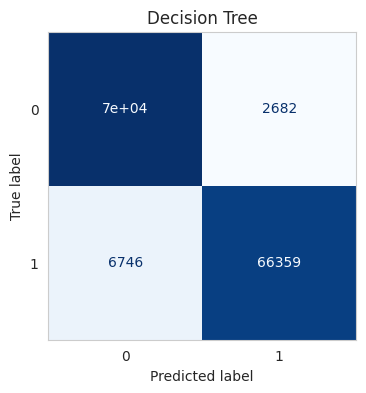

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


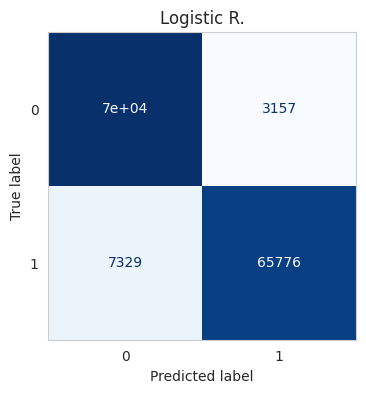

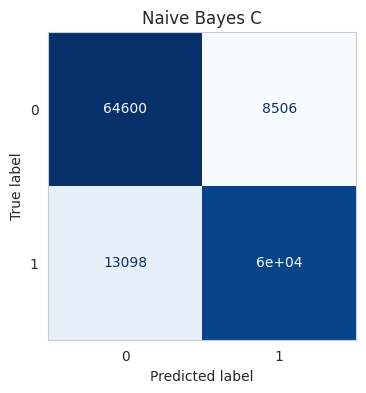

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


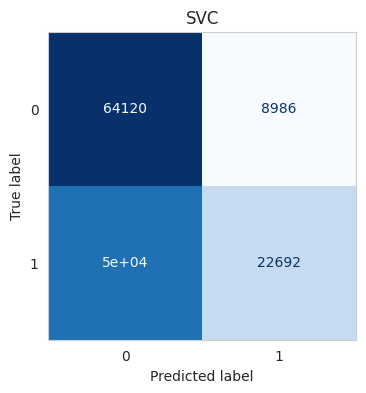

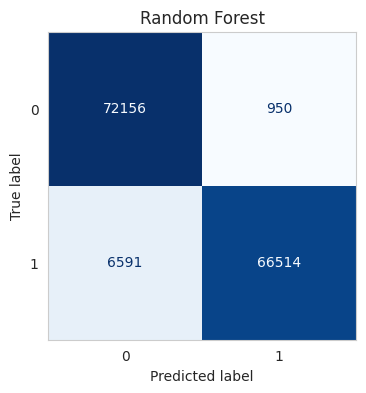

,Model,Recall TP/TP+FN,Precision TP/TP+FP,F1-score,Accuracy TP+TN)/All
0,Decision Tree,90.77,96.12,93.37,93.55
1,Logistic R.,89.97,95.42,92.62,92.83
2,Naive Bayes C,82.08,87.58,84.74,85.22
3,SVC,31.04,71.63,43.31,59.37
4,Random Forest,90.98,98.59,94.64,94.84


In [32]:
# plot the confusion matrix
test_models(X_train, X_test, y_train, y_test)

#### c- Comparison between models:

In [33]:
# Comparison between models by accuracy
results.sort_values('Accuracy TP+TN)/All', ascending=False)

,Model,Recall TP/TP+FN,Precision TP/TP+FP,F1-score,Accuracy TP+TN)/All
4,Random Forest,90.98,98.59,94.64,94.84
0,Decision Tree,90.77,96.12,93.37,93.55
1,Logistic R.,89.97,95.42,92.62,92.83
2,Naive Bayes C,82.08,87.58,84.74,85.22
3,SVC,31.04,71.63,43.31,59.37


**The Random Forest model has the best accuracy but it takes the longest time compared to Decision Tree,The Decision Tree is the best model for accuracy and consumption of resources and time**

## Conclusion:
- The analysis confirmed that factors like age, sex, smoking habits, and general health status significantly influence heart disease risk.
- The Decision Tree model was selected as the optimal approach due to its combination of high accuracy and computational efficiency, making it suitable for practical applications where quick predictions are necessary